In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
import re



In [128]:
df = pd.read_excel("labels_data.xlsx")
df= df.drop(index=df.index[0])
df = df[df['Duration (in seconds)']>150]

/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# define latex for plots
plt.rcParams.update({
        'text.usetex': False,
        'font.family': 'serif'
    })
# define a common colormap
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

In [130]:
col = 'Q34' 
freq_dict = df[col].value_counts().to_dict()
extra_values = ["Slightly", "Moderately"]
for val in extra_values:
    if val not in freq_dict:
        freq_dict[val] = 0


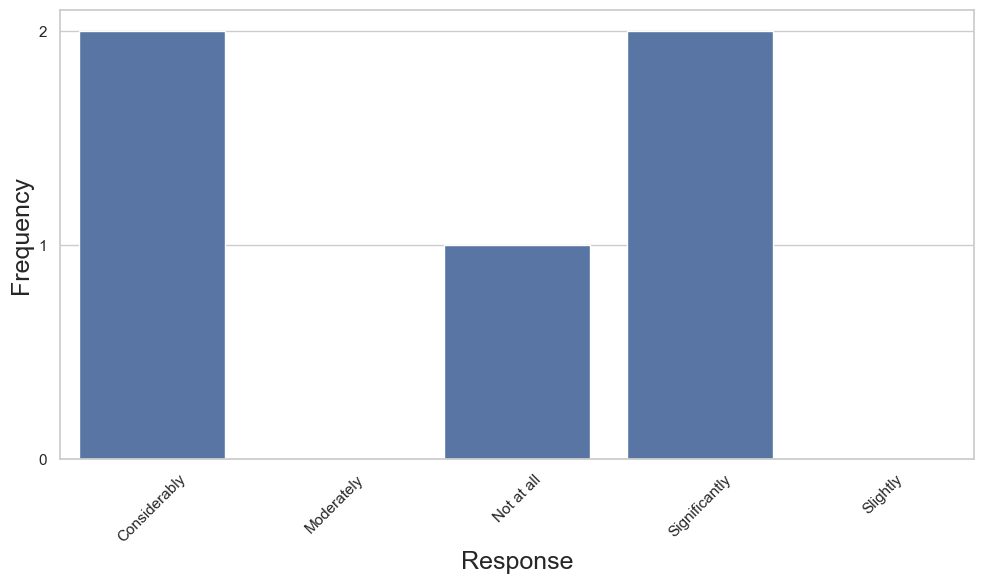

In [131]:
plt.figure(figsize=(10, 6))


freq_df = (
    pd.DataFrame(list(freq_dict.items()), columns=['Value', 'Frequency'])
    .sort_values('Value')  # Optional: sort alphabetically
)

# 4. Plot in Seaborn
sns.set_theme(style="whitegrid")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

sns.barplot(data=freq_df, x='Value', y='Frequency', )

# Styling
plt.xlabel("Response", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("plots/responses.svg", bbox_inches='tight')
plt.show()

In [132]:
df = pd.read_excel("study.xlsx")
df= df.drop(index=df.index[0])
df = df[df['Duration (in seconds)']>150]


/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [133]:
df.columns.to_list()

['StartDate',
 'EndDate',
 'Status',
 'IPAddress',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'RecipientLastName',
 'RecipientFirstName',
 'RecipientEmail',
 'ExternalReference',
 'LocationLatitude',
 'LocationLongitude',
 'DistributionChannel',
 'UserLanguage',
 'Q29_1',
 'Q29_2',
 'Q29_3',
 'Q29_4',
 'Q29_5',
 'Q29_6',
 'Q30',
 'Q14_1',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q14_5',
 'Q14_6',
 'Q14_7',
 'Q14_8',
 'Q15',
 'Q16_1',
 'Q16_2',
 'Q16_3',
 'Q16_4',
 'Q17',
 'Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q18_5',
 'Q18_6',
 'Q18_7',
 'Q19',
 'Q20_1',
 'Q20_2',
 'Q20_3',
 'Q20_4',
 'Q20_5',
 'Q20_6',
 'Q21',
 'Q36',
 'Q35',
 'Q34',
 'Q26',
 'Q37',
 'Q38_1',
 'Q38_2',
 'Q38_3',
 'Q38_4',
 'Q38_5',
 'Q38_6',
 'Q38_7',
 'Q38_8',
 'Q39',
 'Q40_1',
 'Q40_2',
 'Q40_3',
 'Q40_4',
 'Q41',
 'Q42_1',
 'Q42_2',
 'Q42_3',
 'Q42_4',
 'Q42_5',
 'Q42_6',
 'Q42_7',
 'Q43',
 'Q44_1',
 'Q44_2',
 'Q44_3',
 'Q44_4',
 'Q44_5',
 'Q44_6',
 'Q45',
 'group_in_first']

In [134]:
d = {'Q14': 'patterns1', 'Q15': 'exp_patterns1', 'Q16': 'people1',  'Q17': 'exp_people1', 'Q18': 'vul1', 'Q19': 'exp_vul1', 'Q20': 'loc1', 'Q21': 'exp_loc1', 'Q38': 'patterns2', 'Q39': 'exp_patterns2', 'Q40': 'people2', 'Q41': 'exp_people2', 'Q42': 'vul2', 'Q43': 'exp_vul2', 'Q44': 'loc2', 'Q45':   'exp_loc2'}

In [135]:
for x in d.keys():
    cols_to_rename = [col for col in df.columns if col.startswith(x)]
    rename_dict = {col: f'{d[x]}_{col[-1]}' for col in cols_to_rename}
    df = df.rename(columns=rename_dict)


In [136]:
df.columns.to_list()

['StartDate',
 'EndDate',
 'Status',
 'IPAddress',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'RecipientLastName',
 'RecipientFirstName',
 'RecipientEmail',
 'ExternalReference',
 'LocationLatitude',
 'LocationLongitude',
 'DistributionChannel',
 'UserLanguage',
 'Q29_1',
 'Q29_2',
 'Q29_3',
 'Q29_4',
 'Q29_5',
 'Q29_6',
 'Q30',
 'patterns1_1',
 'patterns1_2',
 'patterns1_3',
 'patterns1_4',
 'patterns1_5',
 'patterns1_6',
 'patterns1_7',
 'patterns1_8',
 'exp_patterns1_5',
 'people1_1',
 'people1_2',
 'people1_3',
 'people1_4',
 'exp_people1_7',
 'vul1_1',
 'vul1_2',
 'vul1_3',
 'vul1_4',
 'vul1_5',
 'vul1_6',
 'vul1_7',
 'exp_vul1_9',
 'loc1_1',
 'loc1_2',
 'loc1_3',
 'loc1_4',
 'loc1_5',
 'loc1_6',
 'exp_loc1_1',
 'Q36',
 'Q35',
 'Q34',
 'Q26',
 'Q37',
 'patterns2_1',
 'patterns2_2',
 'patterns2_3',
 'patterns2_4',
 'patterns2_5',
 'patterns2_6',
 'patterns2_7',
 'patterns2_8',
 'exp_patterns2_9',
 'people2_1',
 'people2_2',
 'people2_3',
 '

In [137]:
vul1_cols = [col for col in df.columns if col.startswith('people1_')]
suffixes = [col.replace('people1_', '') for col in vul1_cols]

# Loop through each suffix to create a new column
for suffix in suffixes:
    vul1_col = f'people1_{suffix}'
    vul2_col = f'people2_{suffix}'
    new_col_name = f'people_{suffix}_case_1'
    df[new_col_name] = np.where(df['group_in_first'] == '1',
                                df[vul1_col],
                                df[vul2_col])
    vul1_col = f'people1_{suffix}'
    vul2_col = f'people2_{suffix}'
    new_col_name = f'people_{suffix}_case_2'
    df[new_col_name] = np.where(df['group_in_first'] == '2',
                                df[vul1_col],
                                df[vul2_col])
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,exp_loc2_5,group_in_first,people_1_case_1,people_1_case_2,people_2_case_1,people_2_case_2,people_3_case_1,people_3_case_2,people_4_case_1,people_4_case_2
1,2025-08-04 07:59:56,2025-08-04 09:14:23,0,195.11.116.226,100,4466,1,2025-08-04 09:14:23.646000,R_82yGCHosBeAdPv9,NaN,...,There appear to be actual addresses that could...,1,4,5,1,2,3,4,3,4
2,2025-08-07 08:23:25,2025-08-07 08:37:56,0,195.11.116.226,100,870,1,2025-08-07 08:37:56.658000,R_8QVY5YV8FYbE47V,NaN,...,NaN,2,NaN,5,NaN,5,NaN,5,NaN,5
3,2025-08-08 00:44:58,2025-08-08 01:35:15,0,195.11.116.226,100,3016,1,2025-08-08 01:35:16.323000,R_2nI1CYFsJgS90WJ,NaN,...,Again very good representation of location data,1,5,5,5,5,5,5,5,5
4,2025-08-08 01:13:49,2025-08-08 03:52:01,0,195.11.116.226,100,9492,1,2025-08-08 03:52:02.374000,R_82nDo8eX8hESJZ5,NaN,...,This example works a lot better than the last....,2,4,4,3,2,2,1,4,4
5,2025-08-08 04:17:08,2025-08-08 05:20:18,0,195.11.116.226,100,3789,1,2025-08-08 05:20:18.529000,R_2KXsQ3hZ9ADyKOt,NaN,...,NaN,2,NaN,5,NaN,5,NaN,5,NaN,5


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

def create_bar_chart(df, regex_pattern, name_mapping, desired_order, plot_title, show_std=False):
    cols = df.filter(regex=regex_pattern, axis=1)
    column_means = cols.mean()
    column_stds = cols.std()

    plot_data = []
    for col, mean_val in column_means.items():
        match = re.match(regex_pattern, col)
        if match:
            std_val = column_stds.get(col, 0)
            group_label = name_mapping.get(match.group(1), f"Group {match.group(1)}")
            case_group = f"Case {match.group(2)}"
            plot_data.append({'group_label': group_label, 'case_group': case_group, 'mean_value': mean_val, 'std_value': std_val})

    plot_df = pd.DataFrame(plot_data)
    pivoted_df = plot_df.pivot(index='group_label', columns='case_group', values='mean_value')
    pivoted_std_df = plot_df.pivot(index='group_label', columns='case_group', values='std_value')
    pivoted_df = pivoted_df.reindex(desired_order)
    pivoted_std_df = pivoted_std_df.reindex(desired_order)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    fig, ax = plt.subplots(figsize=(20, 30))

    ax.tick_params(axis='both', which='major', labelsize=40)
    sns.set_palette(['#86bebf', '#a14a54'])

    pivoted_df.plot(kind='barh', ax=ax, legend=False)
    for i, container in enumerate(ax.containers):
        case_group = pivoted_df.columns[i]
        if show_std:
            std_values = pivoted_std_df[case_group].values
            labels = [f'{mean:.2f} (SD={std:.2f})' for mean, std in zip(container.datavalues, std_values)]
        else:
            labels = [f'{mean:.2f}' for mean in container.datavalues]
        ax.bar_label(container, labels=labels, padding=5, fontsize=35)

    ax.set_ylabel('')
    ax.tick_params(axis='y', which='major', labelsize=0, length=0)
    ax.legend(fontsize=45,  loc='best')
    y_tick_positions = ax.get_yticks()

    for i, label_text in enumerate(pivoted_df.index):
        y_pos = y_tick_positions[i]
        ax.text(x=0.05, y=y_pos,
                s=label_text,
                ha='left',
                va='center',
                fontsize=50,
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.3'))
    
    max_value = pivoted_df.max().max()
    ax.set_xlim(right=max_value + max_value * 0.15)
    plt.xlabel('Average Score', fontsize=40)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"plots/{plot_title}.svg", bbox_inches='tight')

    plt.show()

    print(f"Calculated Means per Column for {plot_title}:")
    print(column_means)
    print(f"\nReshaped Data for Plotting for {plot_title}:")
    print(pivoted_df)






  people_1_case_1 people_1_case_2 people_2_case_1 people_2_case_2  \
1               4               5               1               2   
2             NaN               5             NaN               5   
3               5               5               5               5   
4               4               4               3               2   
5             NaN               5             NaN               5   

  people_3_case_1 people_3_case_2 people_4_case_1 people_4_case_2  
1               3               4               3               4  
2             NaN               5             NaN               5  
3               5               5               5               5  
4               2               1               4               4  
5             NaN               5             NaN               5  


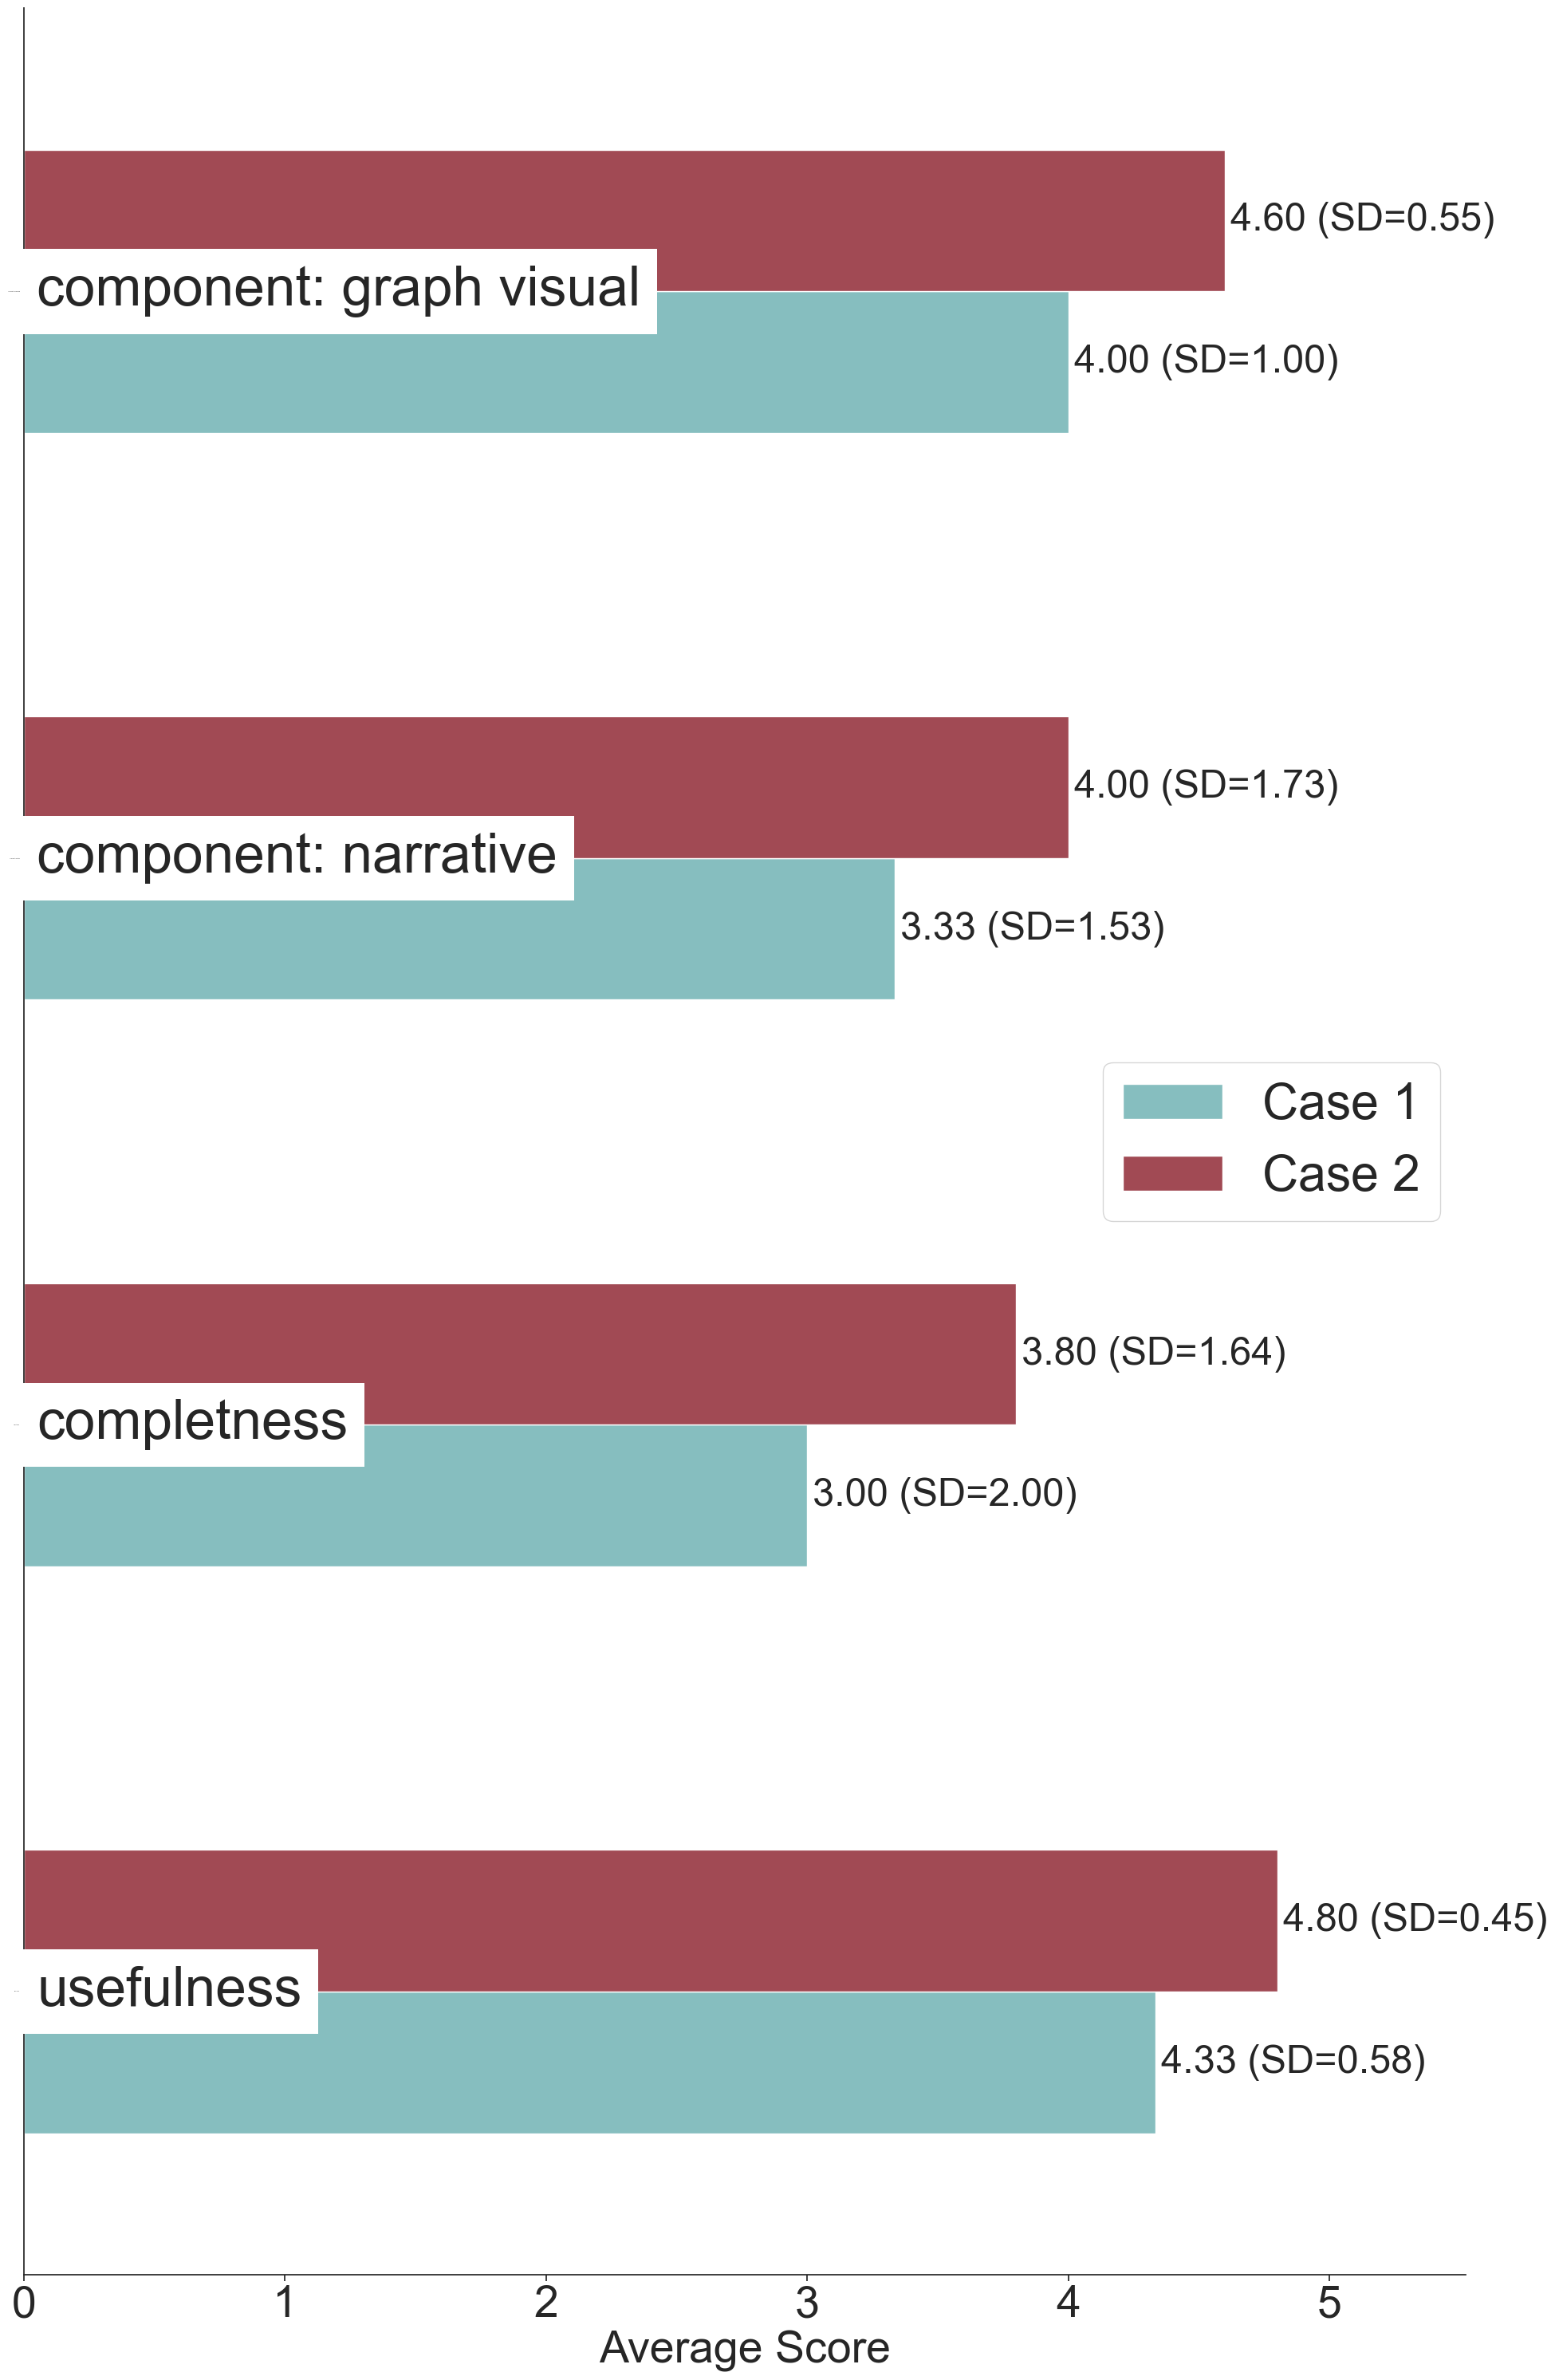

Calculated Means per Column for people:
people_1_case_1    4.333333
people_1_case_2         4.8
people_2_case_1         3.0
people_2_case_2         3.8
people_3_case_1    3.333333
people_3_case_2         4.0
people_4_case_1         4.0
people_4_case_2         4.6
dtype: object

Reshaped Data for Plotting for people:
case_group                 Case 1  Case 2
group_label                              
usefulness               4.333333     4.8
completness              3.000000     3.8
component: narrative     3.333333     4.0
component: graph visual  4.000000     4.6


In [139]:
people_cols = df.filter(like='people_', axis=1)
print(people_cols)

column_means = people_cols.mean()
column_stds = people_cols.std()

name_mapping_people = {'1': 'usefulness', '2': 'completness', '3': 'component: narrative', '4': 'component: graph visual'}
desired_order_people = ['usefulness', 'completness', 'component: narrative', 'component: graph visual']

create_bar_chart(people_cols, r'people_(\d+)_case_(\d+)', name_mapping_people, desired_order_people, 'people', show_std=True)

In [140]:
patterns1_cols = [col for col in df.columns if col.startswith('patterns1_')]
suffixes = [col.replace('patterns1_', '') for col in patterns1_cols]

# Loop through each suffix to create a new column
for suffix in suffixes:
    patterns1_col = f'patterns1_{suffix}'
    patterns2_col = f'patterns2_{suffix}'
    new_col_name = f'patterns_{suffix}_case_1'
    df[new_col_name] = np.where(df['group_in_first'] == '1',
                                df[patterns1_col],
                                df[patterns2_col])
    patterns1_col = f'patterns1_{suffix}'
    patterns2_col = f'patterns2_{suffix}'
    new_col_name = f'patterns_{suffix}_case_2'
    df[new_col_name] = np.where(df['group_in_first'] == '2',
                                df[patterns1_col],
                                df[patterns2_col])
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,patterns_4_case_1,patterns_4_case_2,patterns_5_case_1,patterns_5_case_2,patterns_6_case_1,patterns_6_case_2,patterns_7_case_1,patterns_7_case_2,patterns_8_case_1,patterns_8_case_2
1,2025-08-04 07:59:56,2025-08-04 09:14:23,0,195.11.116.226,100,4466,1,2025-08-04 09:14:23.646000,R_82yGCHosBeAdPv9,NaN,...,4,4,4,4,4,4,4,4,5,5
2,2025-08-07 08:23:25,2025-08-07 08:37:56,0,195.11.116.226,100,870,1,2025-08-07 08:37:56.658000,R_8QVY5YV8FYbE47V,NaN,...,NaN,5,NaN,5,NaN,5,NaN,5,NaN,5
3,2025-08-08 00:44:58,2025-08-08 01:35:15,0,195.11.116.226,100,3016,1,2025-08-08 01:35:16.323000,R_2nI1CYFsJgS90WJ,NaN,...,4,5,4,5,5,5,5,5,5,5
4,2025-08-08 01:13:49,2025-08-08 03:52:01,0,195.11.116.226,100,9492,1,2025-08-08 03:52:02.374000,R_82nDo8eX8hESJZ5,NaN,...,1,1,1,1,1,3,1,2,4,4
5,2025-08-08 04:17:08,2025-08-08 05:20:18,0,195.11.116.226,100,3789,1,2025-08-08 05:20:18.529000,R_2KXsQ3hZ9ADyKOt,NaN,...,NaN,5,NaN,5,NaN,4,NaN,5,NaN,5


  patterns_1_case_1 patterns_1_case_2 patterns_2_case_1 patterns_2_case_2  \
1                 5                 5                 4                 4   
2               NaN                 5               NaN                 5   
3                 5                 5                 5                 5   
4                 4                 3                 2                 1   
5               NaN                 5               NaN                 5   

  patterns_3_case_1 patterns_3_case_2 patterns_4_case_1 patterns_4_case_2  \
1                 4                 4                 4                 4   
2               NaN                 5               NaN                 5   
3                 5                 5                 4                 5   
4                 2                 4                 1                 1   
5               NaN                 5               NaN                 5   

  patterns_5_case_1 patterns_5_case_2 patterns_6_case_1 patterns_6_case_2 

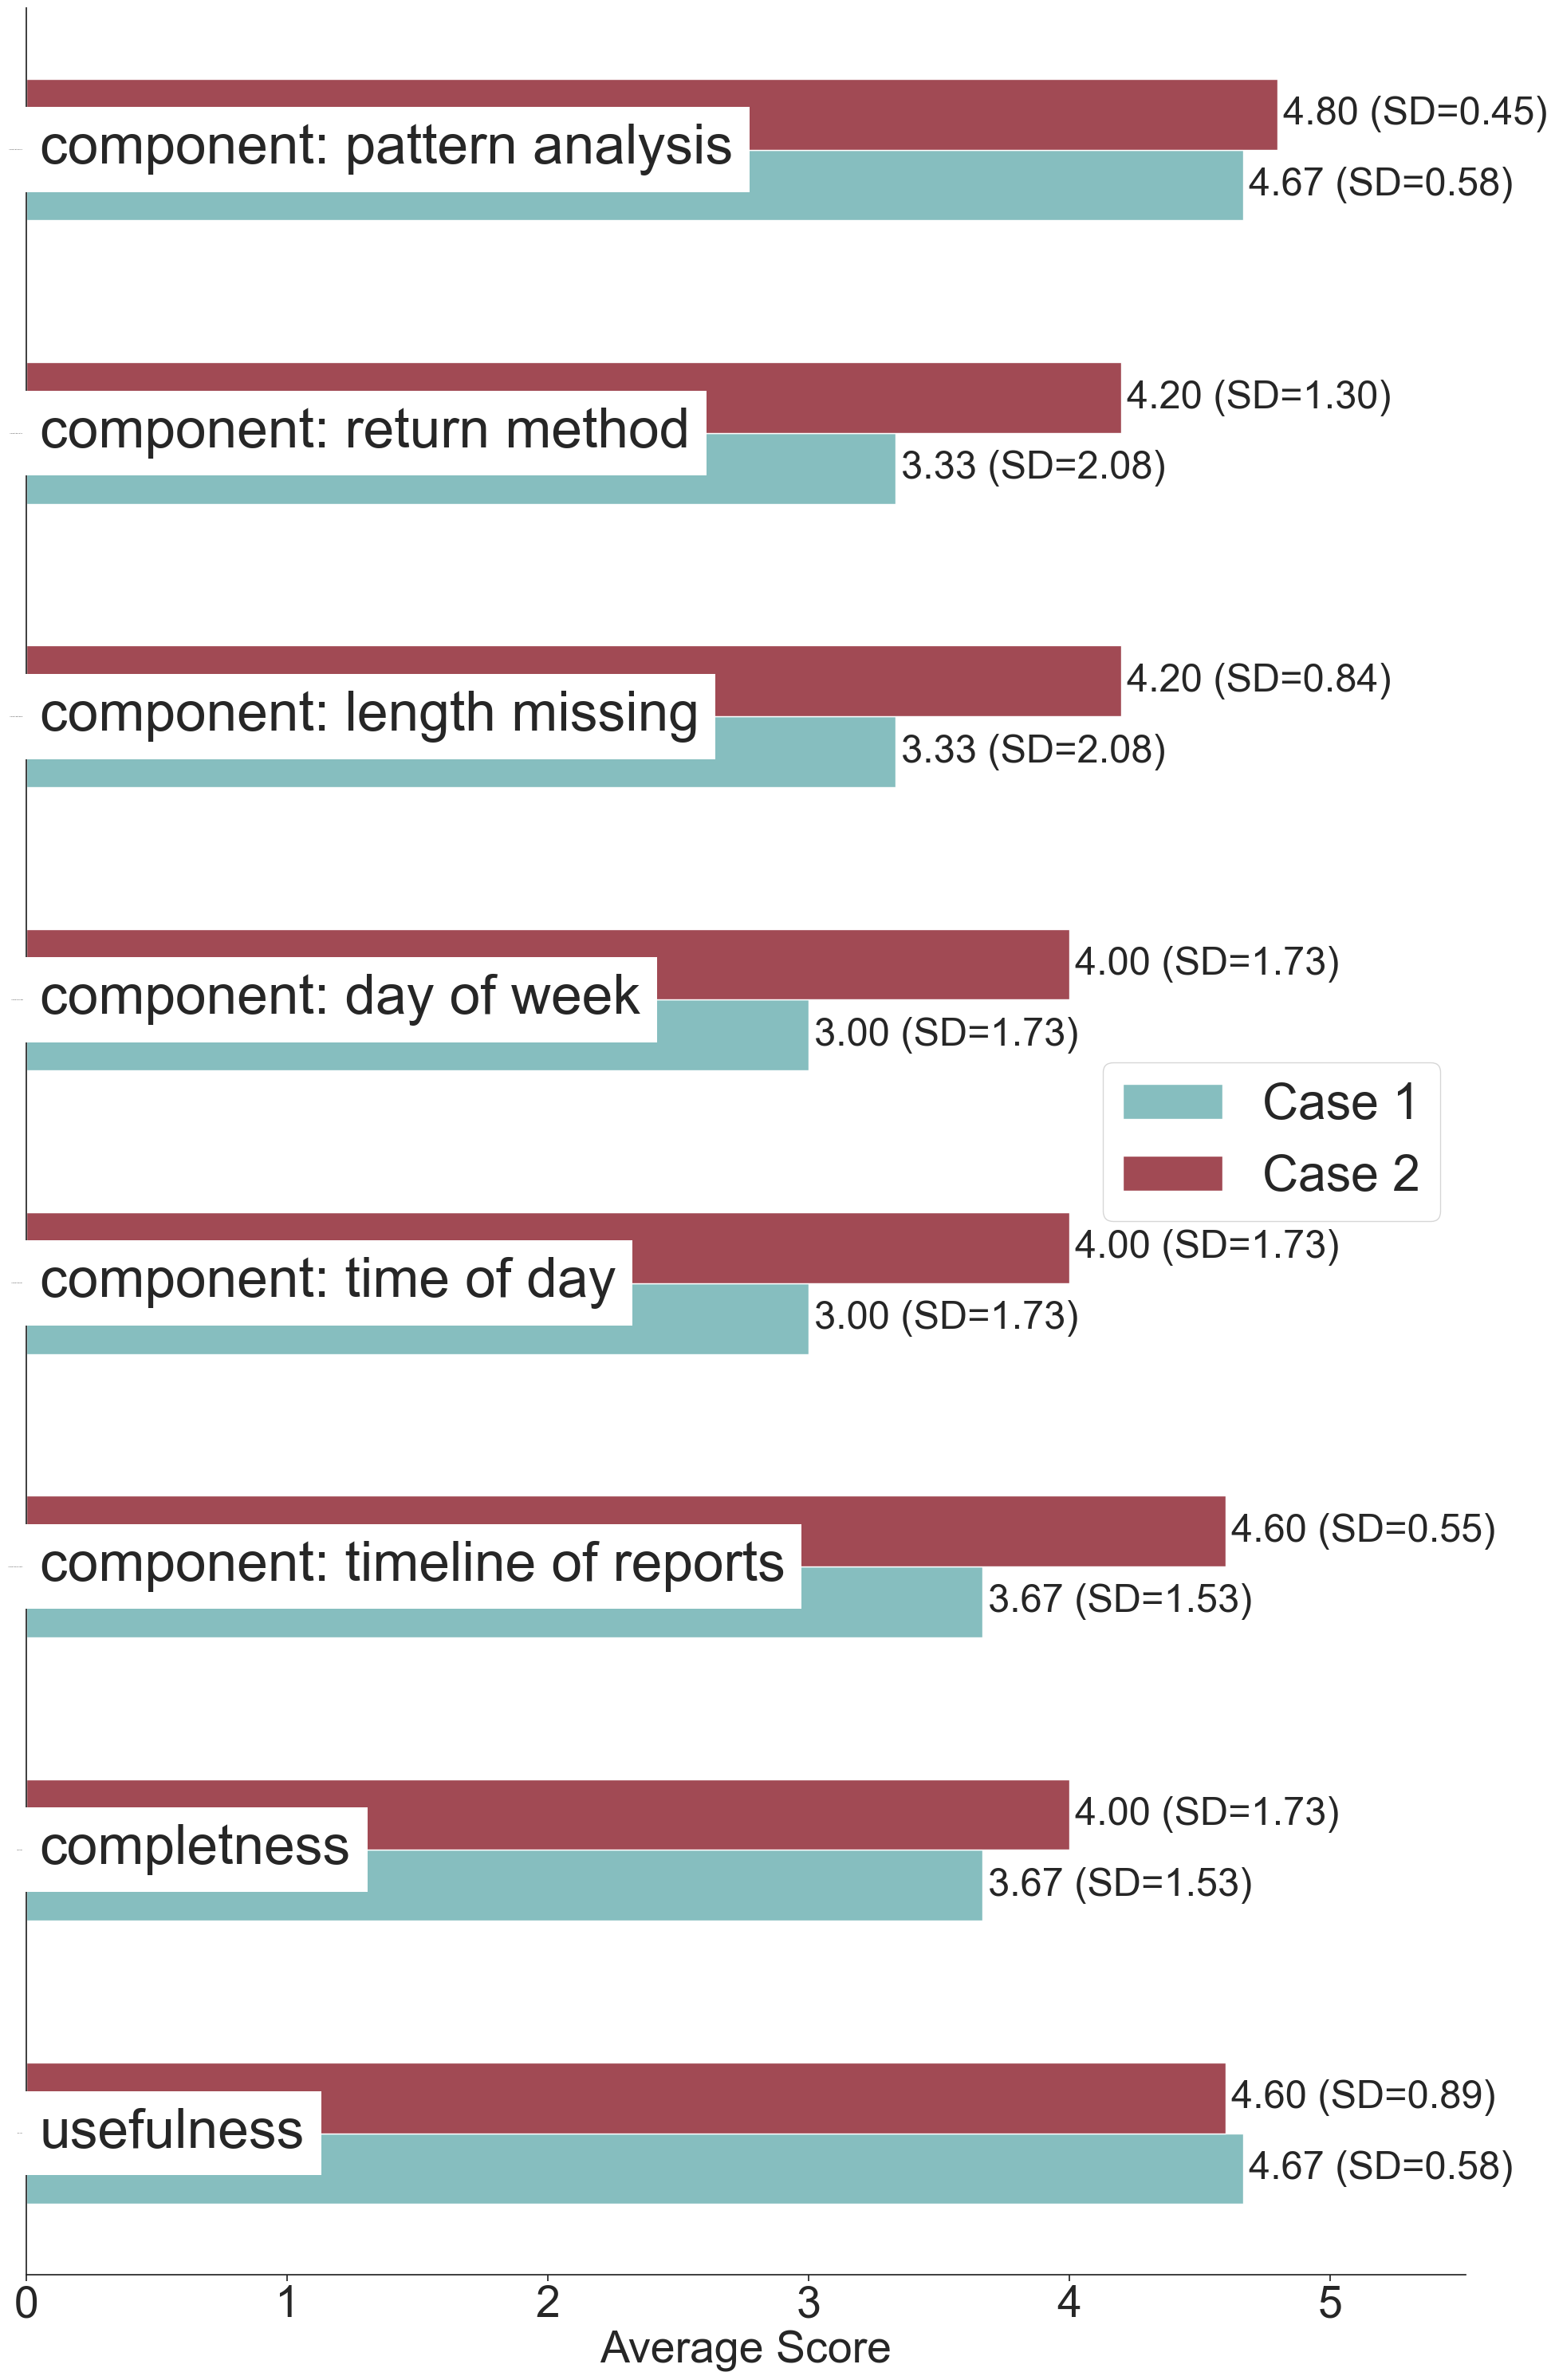

Calculated Means per Column for patterns:
patterns_1_case_1    4.666667
patterns_1_case_2         4.6
patterns_2_case_1    3.666667
patterns_2_case_2         4.0
patterns_3_case_1    3.666667
patterns_3_case_2         4.6
patterns_4_case_1         3.0
patterns_4_case_2         4.0
patterns_5_case_1         3.0
patterns_5_case_2         4.0
patterns_6_case_1    3.333333
patterns_6_case_2         4.2
patterns_7_case_1    3.333333
patterns_7_case_2         4.2
patterns_8_case_1    4.666667
patterns_8_case_2         4.8
dtype: object

Reshaped Data for Plotting for patterns:
case_group                        Case 1  Case 2
group_label                                     
usefulness                      4.666667     4.6
completness                     3.666667     4.0
component: timeline of reports  3.666667     4.6
component: time of day          3.000000     4.0
component: day of week          3.000000     4.0
component: length missing       3.333333     4.2
component: return method      

In [141]:
patterns_cols = df.filter(like='patterns_', axis=1)
print(patterns_cols)

column_means = patterns_cols.mean()
column_stds = patterns_cols.std()

name_mapping_patterns = {'1': 'usefulness', '2': 'completness', '3': 'component: timeline of reports', '4': 'component: time of day', '5': 'component: day of week', '6': 'component: length missing', '7': 'component: return method', '8': 'component: pattern analysis'}
desired_order_patterns = ['usefulness', 'completness', 'component: timeline of reports', 'component: time of day', 'component: day of week', 'component: length missing', 'component: return method', 'component: pattern analysis' ]

create_bar_chart(patterns_cols, r'patterns_(\d+)_case_(\d+)', name_mapping_patterns, desired_order_patterns, 'patterns', show_std=True)



In [142]:
vul1_cols = [col for col in df.columns if col.startswith('vul1_')]
suffixes = [col.replace('vul1_', '') for col in vul1_cols]

# Loop through each suffix to create a new column
for suffix in suffixes:
    vul1_col = f'vul1_{suffix}'
    vul2_col = f'vul2_{suffix}'
    new_col_name = f'vul_{suffix}_case_1'
    df[new_col_name] = np.where(df['group_in_first'] == '1',
                                df[vul1_col],
                                df[vul2_col])
    vul1_col = f'vul1_{suffix}'
    vul2_col = f'vul2_{suffix}'
    new_col_name = f'vul_{suffix}_case_2'
    df[new_col_name] = np.where(df['group_in_first'] == '2',
                                df[vul1_col],
                                df[vul2_col])
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,vul_3_case_1,vul_3_case_2,vul_4_case_1,vul_4_case_2,vul_5_case_1,vul_5_case_2,vul_6_case_1,vul_6_case_2,vul_7_case_1,vul_7_case_2
1,2025-08-04 07:59:56,2025-08-04 09:14:23,0,195.11.116.226,100,4466,1,2025-08-04 09:14:23.646000,R_82yGCHosBeAdPv9,NaN,...,5,4,5,3,5,3,4,4,5,4
2,2025-08-07 08:23:25,2025-08-07 08:37:56,0,195.11.116.226,100,870,1,2025-08-07 08:37:56.658000,R_8QVY5YV8FYbE47V,NaN,...,NaN,5,NaN,5,NaN,5,NaN,5,NaN,5
3,2025-08-08 00:44:58,2025-08-08 01:35:15,0,195.11.116.226,100,3016,1,2025-08-08 01:35:16.323000,R_2nI1CYFsJgS90WJ,NaN,...,5,5,5,4,3,3,5,5,5,5
4,2025-08-08 01:13:49,2025-08-08 03:52:01,0,195.11.116.226,100,9492,1,2025-08-08 03:52:02.374000,R_82nDo8eX8hESJZ5,NaN,...,2,1,2,4,1,1,1,4,1,1
5,2025-08-08 04:17:08,2025-08-08 05:20:18,0,195.11.116.226,100,3789,1,2025-08-08 05:20:18.529000,R_2KXsQ3hZ9ADyKOt,NaN,...,NaN,5,NaN,5,NaN,5,NaN,3,NaN,3


  vul_1_case_1 vul_1_case_2 vul_2_case_1 vul_2_case_2 vul_3_case_1  \
1            5            5            5            4            5   
2          NaN            5          NaN            5          NaN   
3            5            5            5            5            5   
4            3            4            2            1            2   
5          NaN            5          NaN            5          NaN   

  vul_3_case_2 vul_4_case_1 vul_4_case_2 vul_5_case_1 vul_5_case_2  \
1            4            5            3            5            3   
2            5          NaN            5          NaN            5   
3            5            5            4            3            3   
4            1            2            4            1            1   
5            5          NaN            5          NaN            5   

  vul_6_case_1 vul_6_case_2 vul_7_case_1 vul_7_case_2  
1            4            4            5            4  
2          NaN            5          NaN      

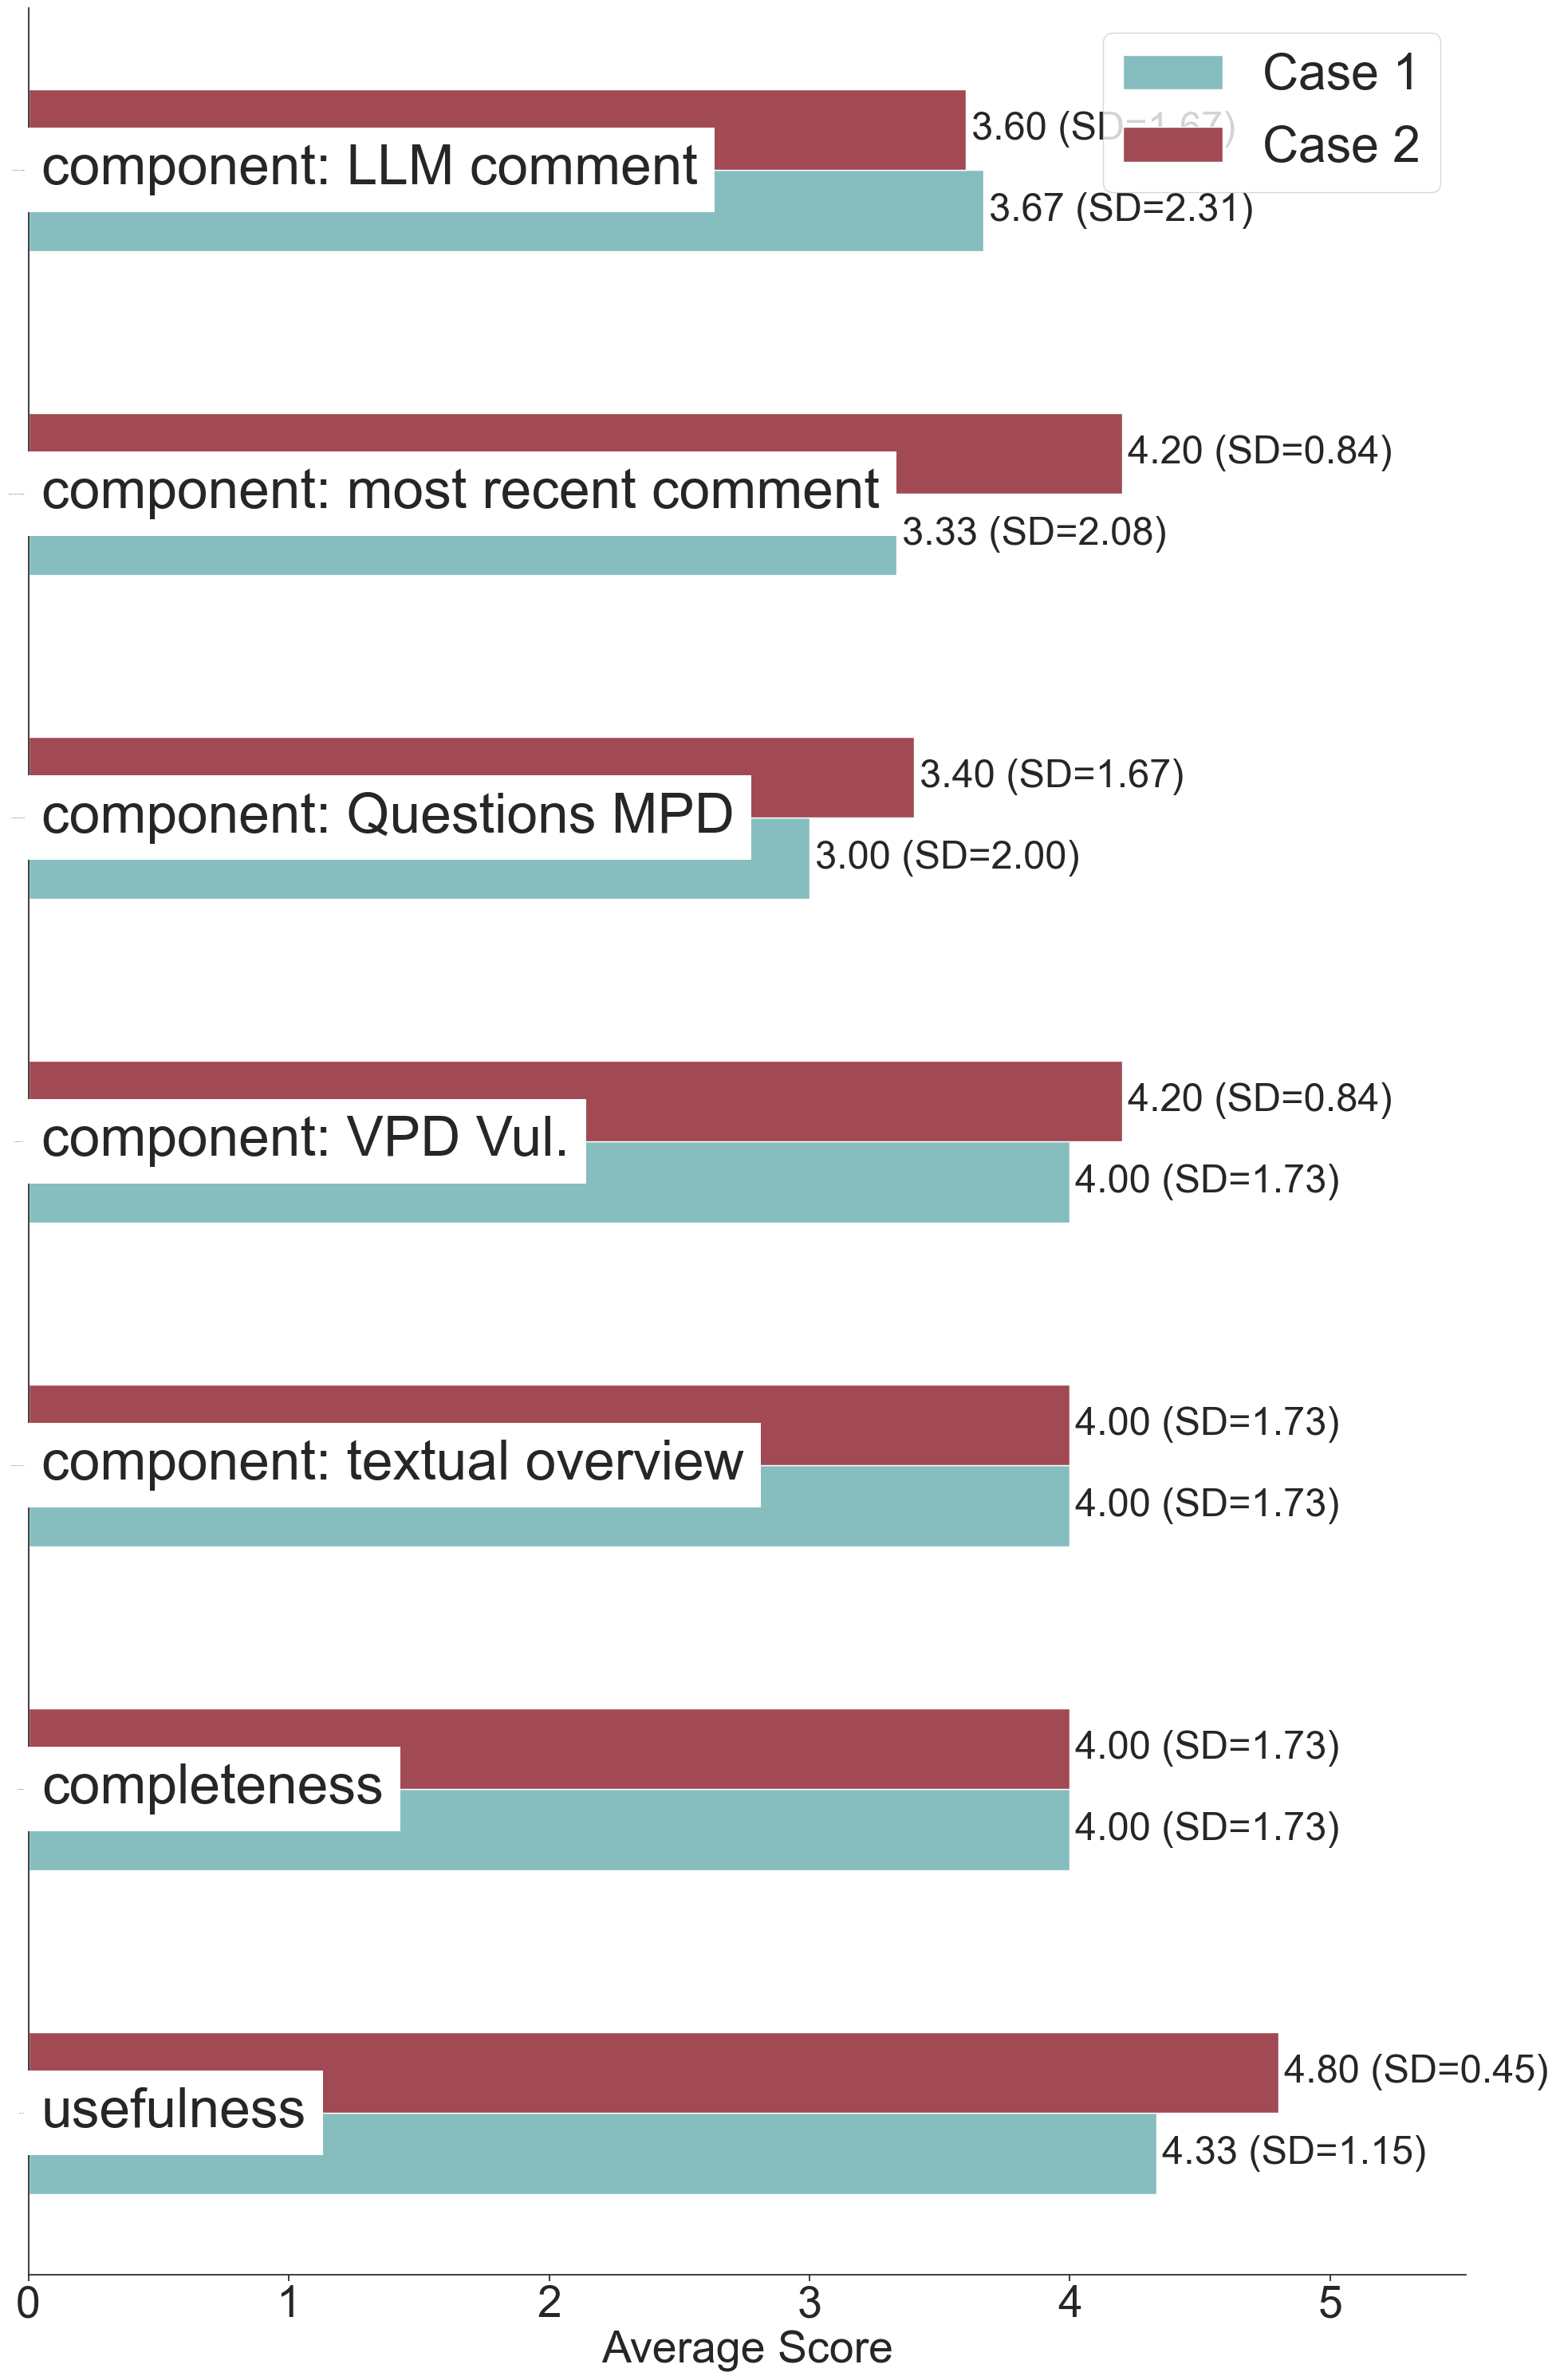

Calculated Means per Column for vul:
vul_1_case_1    4.333333
vul_1_case_2         4.8
vul_2_case_1         4.0
vul_2_case_2         4.0
vul_3_case_1         4.0
vul_3_case_2         4.0
vul_4_case_1         4.0
vul_4_case_2         4.2
vul_5_case_1         3.0
vul_5_case_2         3.4
vul_6_case_1    3.333333
vul_6_case_2         4.2
vul_7_case_1    3.666667
vul_7_case_2         3.6
dtype: object

Reshaped Data for Plotting for vul:
case_group                        Case 1  Case 2
group_label                                     
usefulness                      4.333333     4.8
completeness                    4.000000     4.0
component: textual overview     4.000000     4.0
component: VPD Vul.             4.000000     4.2
component: Questions MPD        3.000000     3.4
component: most recent comment  3.333333     4.2
component: LLM comment          3.666667     3.6


In [147]:
vul_cols = df.filter(like='vul_', axis=1)
print(vul_cols)

column_means = vul_cols.mean()
column_stds = vul_cols.std()

name_mapping_vul =  {'1': 'usefulness', '2': 'completeness', '3': 'component: textual overview', '4': 'component: VPD Vul.', '5': 'component: Questions MPD', '6': 'component: most recent comment', '7': 'component: LLM comment'}
desired_order_vul = ['usefulness', 'completeness', 'component: textual overview', 'component: VPD Vul.', 'component: Questions MPD', 'component: most recent comment',  'component: LLM comment']

create_bar_chart(vul_cols, r'vul_(\d+)_case_(\d+)', name_mapping_vul, desired_order_vul, 'vul', show_std=True)



In [144]:
loc1_cols = [col for col in df.columns if col.startswith('loc1_')]
suffixes = [col.replace('loc1_', '') for col in loc1_cols]

# Loop through each suffix to create a new column
for suffix in suffixes:
    loc1_col = f'loc1_{suffix}'
    loc2_col = f'loc2_{suffix}'
    new_col_name = f'loc_{suffix}_case_1'
    df[new_col_name] = np.where(df['group_in_first'] == '1',
                                df[loc1_col],
                                df[loc2_col])
    loc1_col = f'loc1_{suffix}'
    loc2_col = f'loc2_{suffix}'
    new_col_name = f'loc_{suffix}_case_2'
    df[new_col_name] = np.where(df['group_in_first'] == '2',
                                df[loc1_col],
                                df[loc2_col])
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,loc_2_case_1,loc_2_case_2,loc_3_case_1,loc_3_case_2,loc_4_case_1,loc_4_case_2,loc_5_case_1,loc_5_case_2,loc_6_case_1,loc_6_case_2
1,2025-08-04 07:59:56,2025-08-04 09:14:23,0,195.11.116.226,100,4466,1,2025-08-04 09:14:23.646000,R_82yGCHosBeAdPv9,NaN,...,2,4,4,4,4,3,5,4,4,4
2,2025-08-07 08:23:25,2025-08-07 08:37:56,0,195.11.116.226,100,870,1,2025-08-07 08:37:56.658000,R_8QVY5YV8FYbE47V,NaN,...,NaN,5,NaN,5,NaN,5,NaN,5,NaN,5
3,2025-08-08 00:44:58,2025-08-08 01:35:15,0,195.11.116.226,100,3016,1,2025-08-08 01:35:16.323000,R_2nI1CYFsJgS90WJ,NaN,...,5,5,5,5,5,5,5,5,5,5
4,2025-08-08 01:13:49,2025-08-08 03:52:01,0,195.11.116.226,100,9492,1,2025-08-08 03:52:02.374000,R_82nDo8eX8hESJZ5,NaN,...,3,1,4,4,3,4,4,4,4,2
5,2025-08-08 04:17:08,2025-08-08 05:20:18,0,195.11.116.226,100,3789,1,2025-08-08 05:20:18.529000,R_2KXsQ3hZ9ADyKOt,NaN,...,NaN,5,NaN,5,NaN,5,NaN,5,NaN,5


  loc_1_case_1 loc_1_case_2 loc_2_case_1 loc_2_case_2 loc_3_case_1  \
1            5            5            2            4            4   
2          NaN            5          NaN            5          NaN   
3            5            5            5            5            5   
4            4            4            3            1            4   
5          NaN            5          NaN            5          NaN   

  loc_3_case_2 loc_4_case_1 loc_4_case_2 loc_5_case_1 loc_5_case_2  \
1            4            4            3            5            4   
2            5          NaN            5          NaN            5   
3            5            5            5            5            5   
4            4            3            4            4            4   
5            5          NaN            5          NaN            5   

  loc_6_case_1 loc_6_case_2  
1            4            4  
2          NaN            5  
3            5            5  
4            4            2  
5       

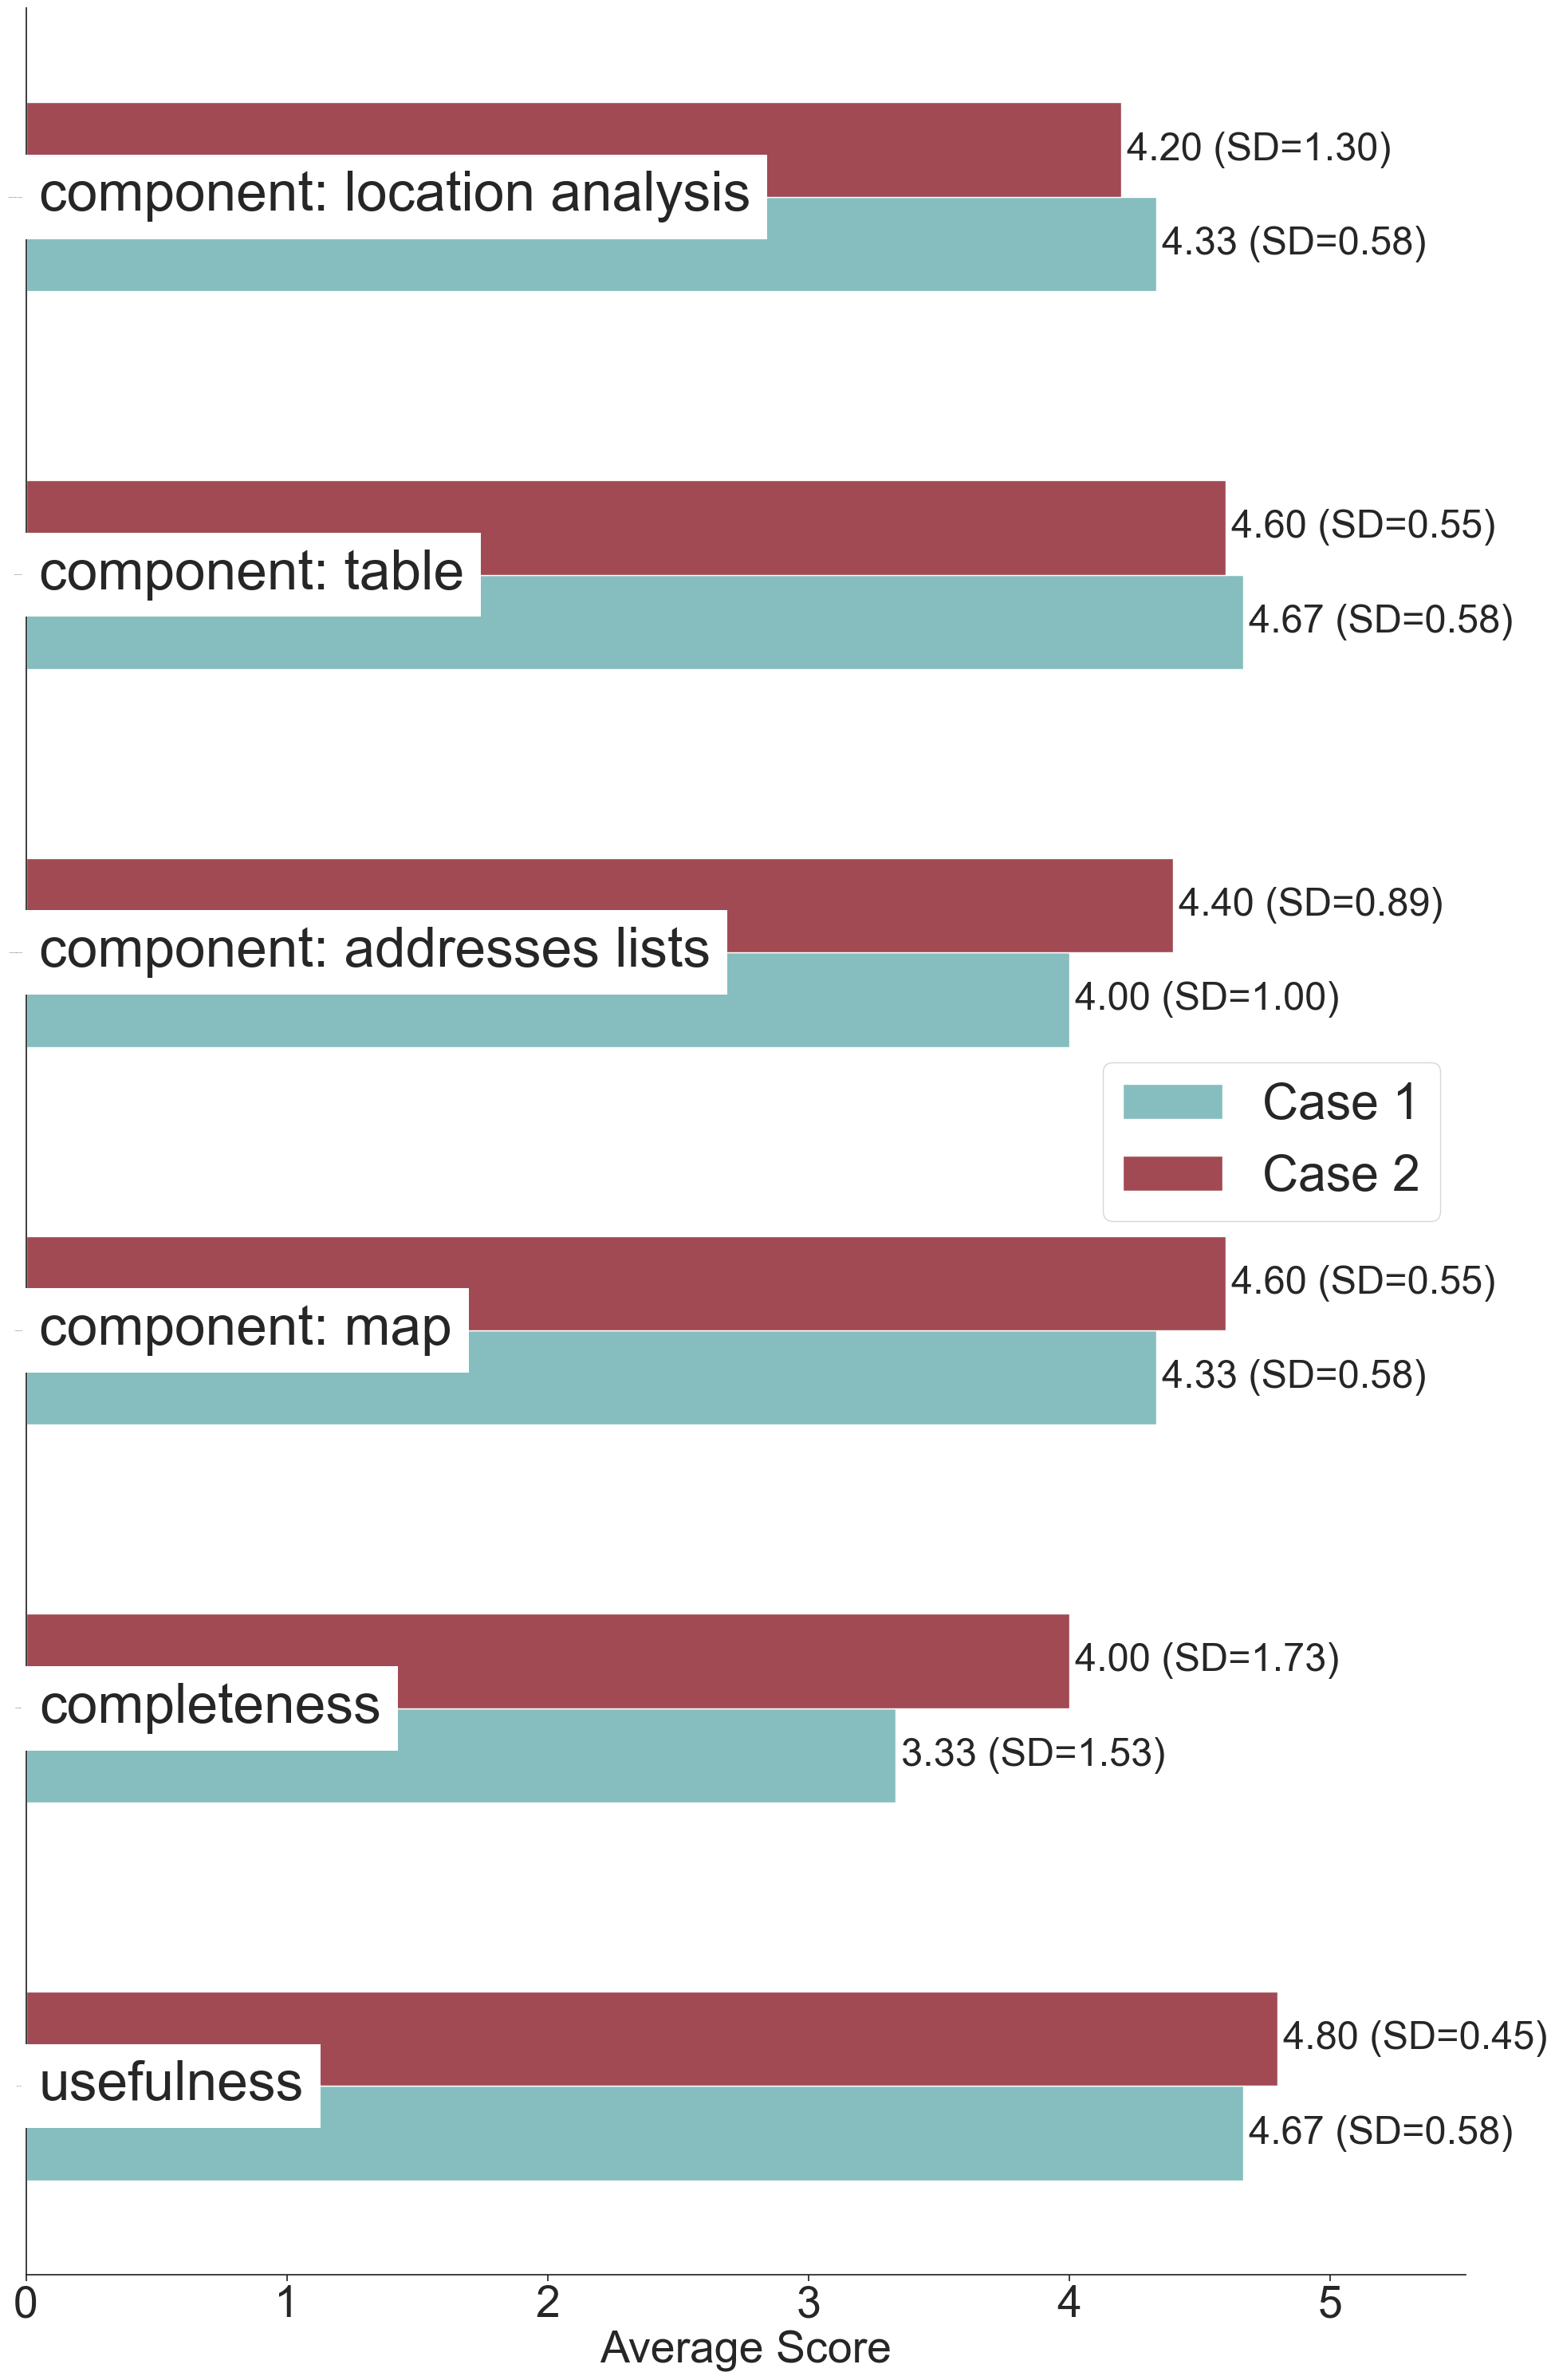

Calculated Means per Column for loc:
loc_1_case_1    4.666667
loc_1_case_2         4.8
loc_2_case_1    3.333333
loc_2_case_2         4.0
loc_3_case_1    4.333333
loc_3_case_2         4.6
loc_4_case_1         4.0
loc_4_case_2         4.4
loc_5_case_1    4.666667
loc_5_case_2         4.6
loc_6_case_1    4.333333
loc_6_case_2         4.2
dtype: object

Reshaped Data for Plotting for loc:
case_group                      Case 1  Case 2
group_label                                   
usefulness                    4.666667     4.8
completeness                  3.333333     4.0
component: map                4.333333     4.6
component: addresses lists    4.000000     4.4
component: table              4.666667     4.6
component: location analysis  4.333333     4.2


In [145]:
loc_cols = df.filter(like='loc_', axis=1)
print(loc_cols)

column_means = loc_cols.mean()
column_stds = loc_cols.std()

name_mapping_loc =  {'1': 'usefulness', '2': 'completeness', '3': 'component: map', '4': 'component: addresses lists', '5': 'component: table', '6': 'component: location analysis'}
desired_order_loc = ['usefulness', 'completeness', 'component: map', 'component: addresses lists', 'component: table', 'component: location analysis']

create_bar_chart(loc_cols, r'loc_(\d+)_case_(\d+)', name_mapping_loc, desired_order_loc, 'loc', show_std=True)



The average for vul_1 is: 4.50
The average for vul_2 is: 3.67
The average for people_1 is: 4.50
The average for people_2 is: 3.00
The average for patterns_1 is: 4.50
The average for patterns_2 is: 3.50
The average for loc_1 is: 4.67
The average for loc_2 is: 3.33


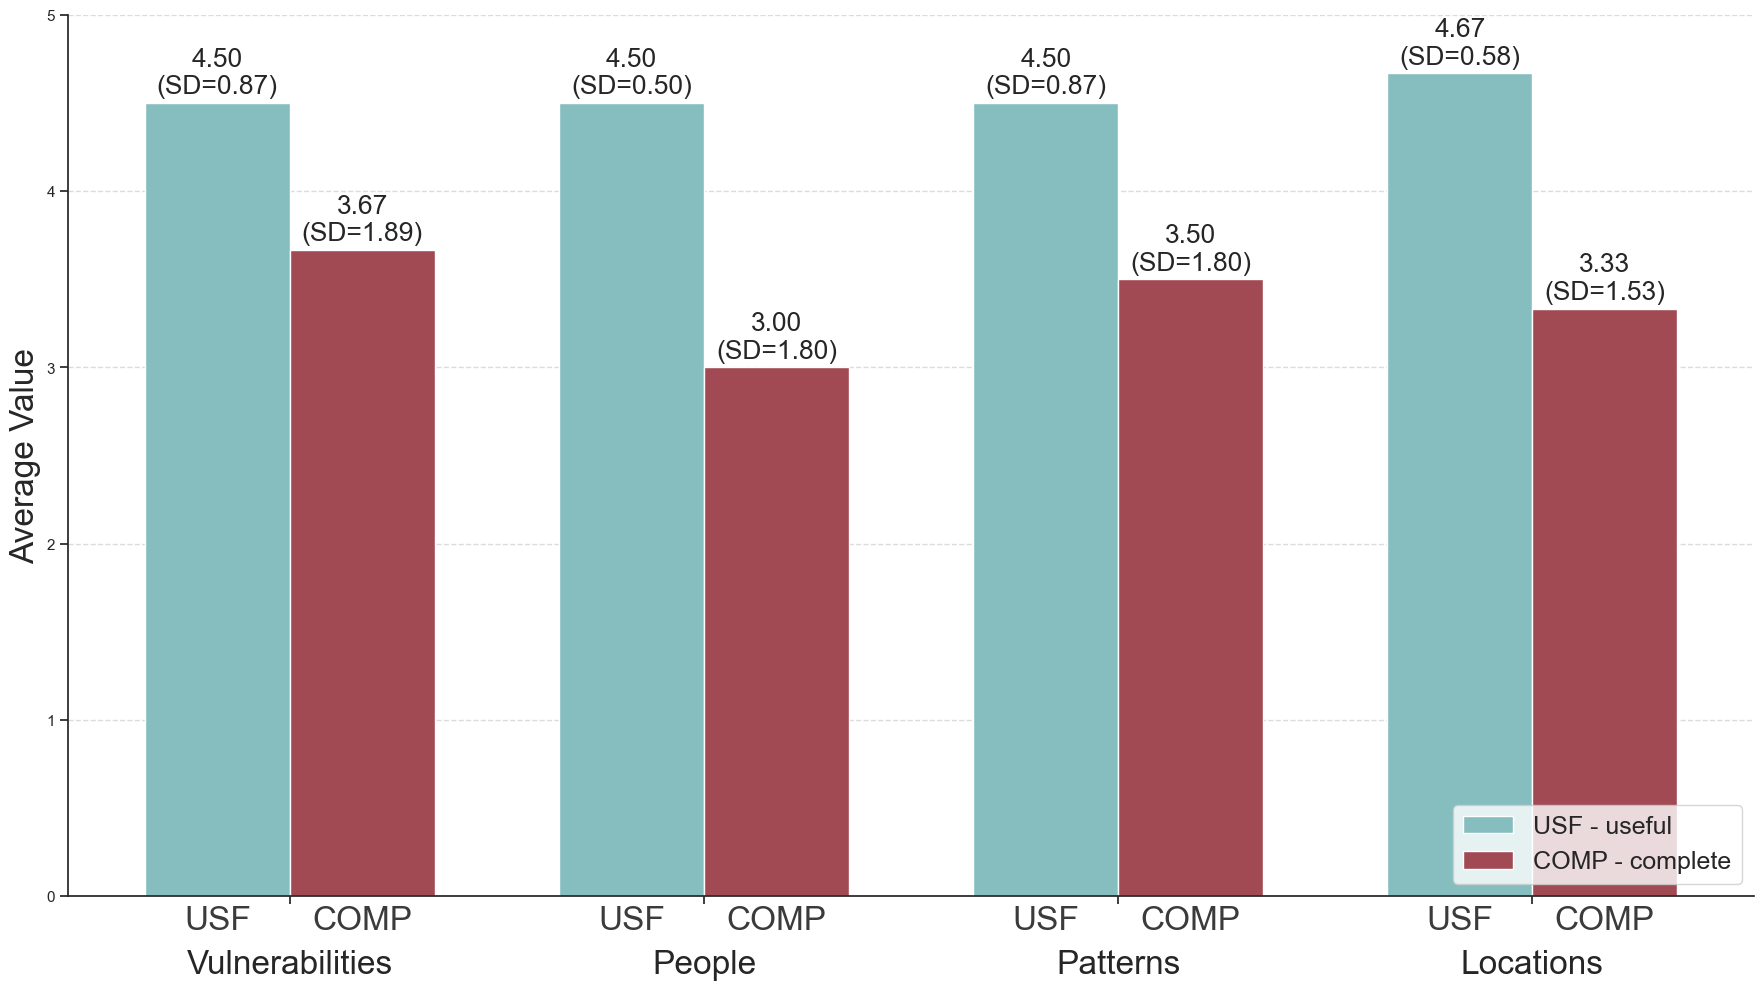

In [146]:
# Calculate the averages in a more readable way
# We sum the two columns row-wise, divide by 2 to get the row average, and then take the mean of those averages.
vul_1_avg = ((df['vul_1_case_1'] + df['vul_1_case_2']) / 2).mean()
vul_2_avg = ((df['vul_2_case_1'] + df['vul_2_case_2']) / 2).mean()
people_1_avg = ((df['people_1_case_1'] + df['people_1_case_2']) / 2).mean()
people_2_avg = ((df['people_2_case_1'] + df['people_2_case_2']) / 2).mean()

patterns_1_avg = ((df['patterns_1_case_1'] + df['patterns_1_case_2']) / 2).mean()
patterns_2_avg = ((df['patterns_2_case_1'] + df['patterns_2_case_2']) / 2).mean()

loc_1_avg = ((df['loc_1_case_1'] + df['loc_1_case_2']) / 2).mean()
loc_2_avg = ((df['loc_2_case_1'] + df['loc_2_case_2']) / 2).mean()

# Calculate the standard deviations
# We sum the two columns row-wise, divide by 2 to get the row average, and then take the standard deviation of those averages.
vul_1_std = ((df['vul_1_case_1'] + df['vul_1_case_2']) / 2).std()
vul_2_std = ((df['vul_2_case_1'] + df['vul_2_case_2']) / 2).std()
people_1_std = ((df['people_1_case_1'] + df['people_1_case_2']) / 2).std()
people_2_std = ((df['people_2_case_1'] + df['people_2_case_2']) / 2).std()

patterns_1_std = ((df['patterns_1_case_1'] + df['patterns_1_case_2']) / 2).std()
patterns_2_std = ((df['patterns_2_case_1'] + df['patterns_2_case_2']) / 2).std()

loc_1_std = ((df['loc_1_case_1'] + df['loc_1_case_2']) / 2).std()
loc_2_std = ((df['loc_2_case_1'] + df['loc_2_case_2']) / 2).std()

# Define the data for plotting
categories = ['Vulnerabilities', 'People', 'Patterns', 'Locations']
group1_averages = [vul_1_avg, people_1_avg, patterns_1_avg, loc_1_avg]
group2_averages = [vul_2_avg, people_2_avg, patterns_2_avg, loc_2_avg]
group1_stds = [vul_1_std, people_1_std, patterns_1_std, loc_1_std]
group2_stds = [vul_2_std, people_2_std, patterns_2_std, loc_2_std]

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(18, 10))

# Set bar width and spacing
bar_width = 0.35
x = np.arange(len(categories))

# Plot the bars for each group with a legend label
rects1 = ax.bar(x - bar_width/2, group1_averages, bar_width, label='USF - useful')
rects2 = ax.bar(x + bar_width/2, group2_averages, bar_width, label='COMP - complete')

# A helper function to add the value labels on top of the bars.
def autolabel(rects, std_values):
    """Attach a text label above each bar in *rects*, displaying its height and std dev."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        std_dev = std_values[i]
        ax.annotate(f'{height:.2f}\n(SD={std_dev:.2f})',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=19)

# Call the helper function for each set of bars to display the values.
autolabel(rects1, group1_stds)
autolabel(rects2, group2_stds)
ax.set_ylim(0, 5)
# Add titles and labels
ax.set_ylabel('Average Value',  fontsize=18)

# Set the x-axis tick labels to be the categories
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=230)

# Add the legend to the plot
ax.legend(fontsize=18,  loc='lower right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ensures labels don't get cut off
# plt.savefig('plots/main.svg') # Note: This line is commented out for demonstration.

ax.set_ylabel('Average Value',  fontsize=24)

# --- Changes applied here ---
# Removed the legend and added manual labels for USF and COMP below the main category labels.

# The positions for the labels
y_pos_group_labels = -0.01  # Position for Group 1/2 labels, relative to the axis
y_pos_main_labels = -0.06  # Position for main category labels, further down

for i, rect in enumerate(rects1):
    ax.text(rect.get_x() + rect.get_width() / 2, y_pos_group_labels, 'USF',
            ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=24, color='#3b3b3b')
for i, rect in enumerate(rects2):
    ax.text(rect.get_x() + rect.get_width() / 2, y_pos_group_labels, 'COMP',
            ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=24, color='#3b3b3b')

# Place the main category labels using the same method for fine-grained control
ax.set_xticks(x)
ax.set_xticklabels([])  # Remove default tick labels to manually place them
for i, category in enumerate(categories):
    ax.text(x[i], y_pos_main_labels, category,
            ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=24)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ensures labels don't get cut off
plt.savefig('plots/main.svg')

print(f"The average for vul_1 is: {vul_1_avg:.2f}")
print(f"The average for vul_2 is: {vul_2_avg:.2f}")
print(f"The average for people_1 is: {people_1_avg:.2f}")
print(f"The average for people_2 is: {people_2_avg:.2f}")
print(f"The average for patterns_1 is: {patterns_1_avg:.2f}")
print(f"The average for patterns_2 is: {patterns_2_avg:.2f}")
print(f"The average for loc_1 is: {loc_1_avg:.2f}")
print(f"The average for loc_2 is: {loc_2_avg:.2f}")

